In [1]:
import gdal
#from osgeo import gdal
from numpy import *

import matplotlib.pyplot as plt
%matplotlib inline

import rasterio
from rasterio import plot

from spectral import *
import spectral.io.envi

from rasterio.plot import show

In [2]:
%run filmstrip

ready...


In [3]:
import geopandas
og = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
oge = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")

In [4]:
rpath= "/Users/brian/code/firedamage/Tinaroo/54590833-d7ba-467f-83a0-99e034405465/1/files/"


stem = "LC08_L1TP_096072_20191108_20191115"
fntag = "tinaroo"
ls2envi_full(rpath,stem,fntag)

In [5]:
sds = gdal.Open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif")
driver = gdal.GetDriverByName('ENVI')
dst = driver.CreateCopy("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil",sds)
dst = None
spy_image = envi.open("/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.hdr",
                      image="/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.bil")


ImageView object:
  Display bands       :  (3, 2, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 17771.0]
    G: [0.0, 15587.0]
    B: [0.0, 13811.0]

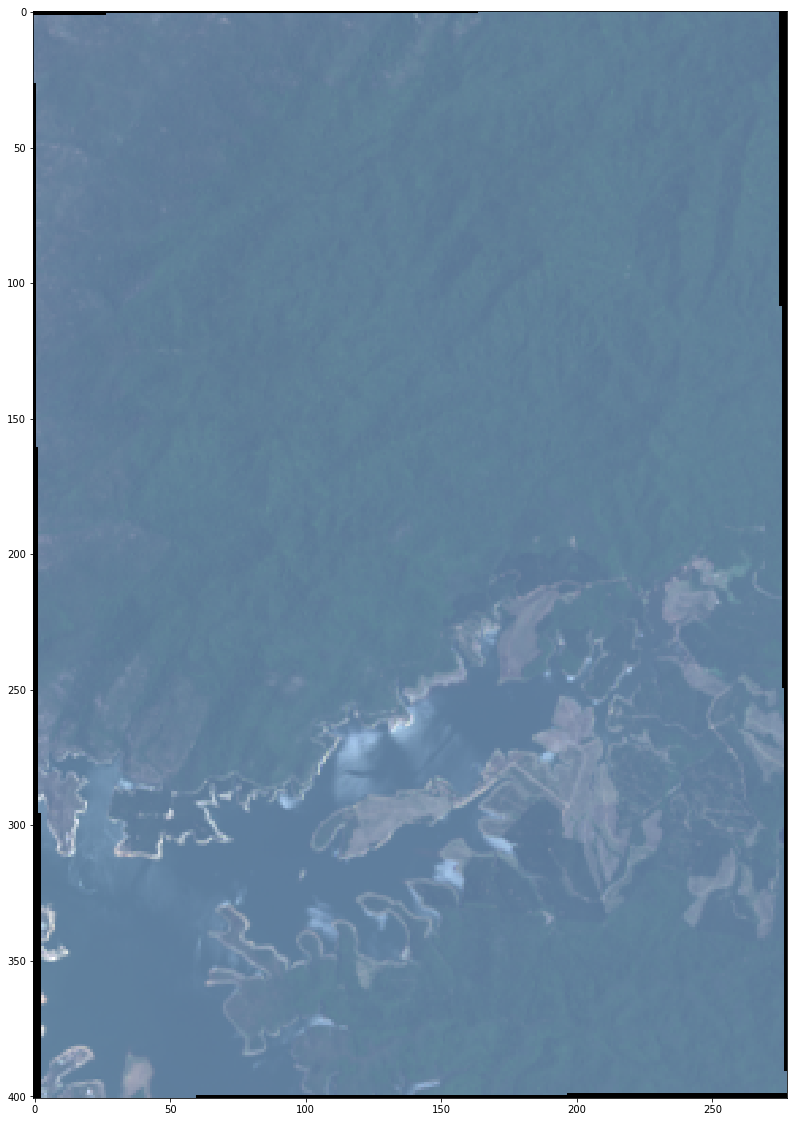

In [6]:
imshow(spy_image, (3,2,1), figsize=(20,20))

In [11]:
import geopandas
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")

ucl = euc['QLD_REG_EC'].unique().tolist()
uclm = ogm['RE'].unique().tolist()

uclb = ucl + uclm

euco = {k: v for v, k in enumerate(ucl)} 

nonucl = noneuc['RE'].unique().tolist()
noneuco = {k: v for v, k in enumerate(nonucl)}

zg = {**euco, **noneuco}
import copy
zgz = copy.deepcopy(zg)
counter = 10
zk = list(zgz.keys())
for p in range(0,len(zgz)):
    zgz[zk[p]] = counter
    counter += 1

In [13]:
x = pd.read_csv("sub2polyNE.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13,14,15,16,17,18,21,22,23,24,26,27,28,29,30,31,32,33,34,37,50,54,56,58,60,61,62,64,70,71,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
import geopandas
noneuc = geopandas.read_file("Non_Eucalyptus_Reg_Ecos/Non_Eucalypt_RE.shp")
euc = geopandas.read_file("FF_SingleSp_RE_2017_V11.shp")
ogm = geopandas.read_file("Monogenus_Monotribe_Eucalypt_Reg_Ecos_2017/Monotribe_Eucalypt_REs_2017_100pct.shp")
ogms = ogm[['RE', 'Descriptio', 'geometry']].copy()
noneucs = noneuc[['RE', 'Descriptio', 'geometry']].copy()
eucs = euc[['QLD_REG_EC','FF_singl_1','geometry']].copy()
eucs.rename(columns={'QLD_REG_EC': 'RE', 'FF_singl_1': 'Descriptio', 'geometry': 'geometry'}, inplace=True)
eucs['euc'] = 1
ogms['euc'] = 1
noneucs['euc'] = 0
merged = eucs.append(ogms,sort=False)
fpdf = merged.append(noneucs,sort=False)
len(fpdf)

112480

In [9]:
len(fpdf)

112480

In [19]:
%run create_training_polygons
hsf = "/Users/brian/code/FloweringPolygons/"+fntag+"_reflectance_full.tif"
#hnon = xkpls(hsf,spy_image,8,'sub2polyNE.csv',4326,4283,32654,0,535,0,7590,zgz)

#hnon = xkpls(hsf,spy_image,8,'sub2polyNE.csv',4326,4283,32655,0,441,0,745,zgz)

hnon = xkpls_m(hsf,spy_image,8,fpdf,4326,4283,32655,0,12030,0,8340,zgz)

ready...
------src.ref_____
+init=epsg:32655
---------lbrt-------------
345795.0 -1900665.0 354135.0 -1888635.0
---------spoly-------------
POLYGON ((345795 -1888635, 345795 -1900665, 354135 -1900665, 354135 -1888635, 345795 -1888635))
image pixel dimensions:
(401, 278, 12)
xpoly.bounds: (345795.0, -1900665.0, 354135.0, -1888635.0)
chd:12030.0 cwd:8340.0
poly number: 1
hits number: 90
4 of 90
9 of 90
14 of 90
19 of 90
24 of 90
29 of 90
34 of 90
39 of 90
44 of 90
49 of 90
54 of 90
59 of 90
64 of 90
69 of 90
74 of 90
79 of 90
84 of 90
89 of 90
done.


In [7]:
len(data)

24996

In [38]:
type(hnon)
hnon.ndim
hnon.size
hnon.shape

(441, 745)

In [14]:
unique, counts = np.unique(hnon, return_counts=True)

In [15]:
unique

array([0., 2., 3.])

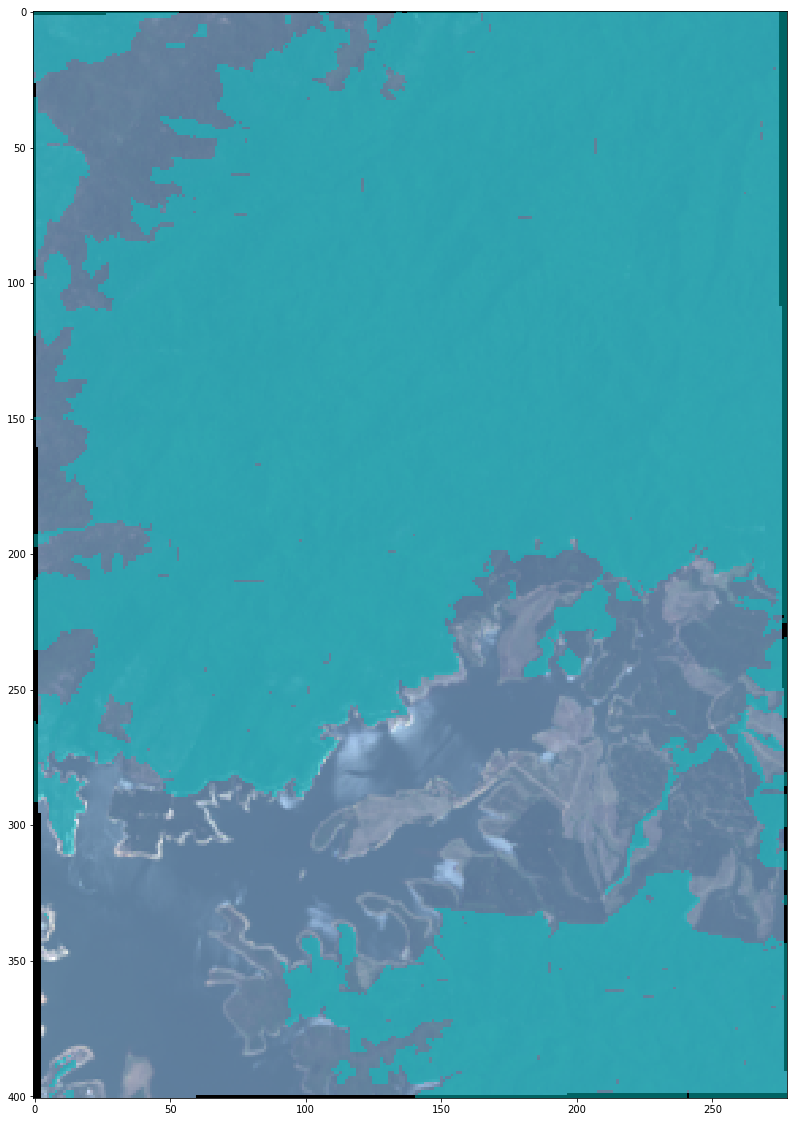

In [20]:

view = imshow(spy_image, (3, 2, 1), classes=hnon,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.5

Setting min samples to 12
Covariance.....  0.0%Covariance.....  0.0%Covariance.....done  
Covariance.....  0.0%Covariance.....  0.0%Covariance.....done  
Classifying image...  0.0%Classifying image...done  


ImageView object:
  Interpolation       :  <default>

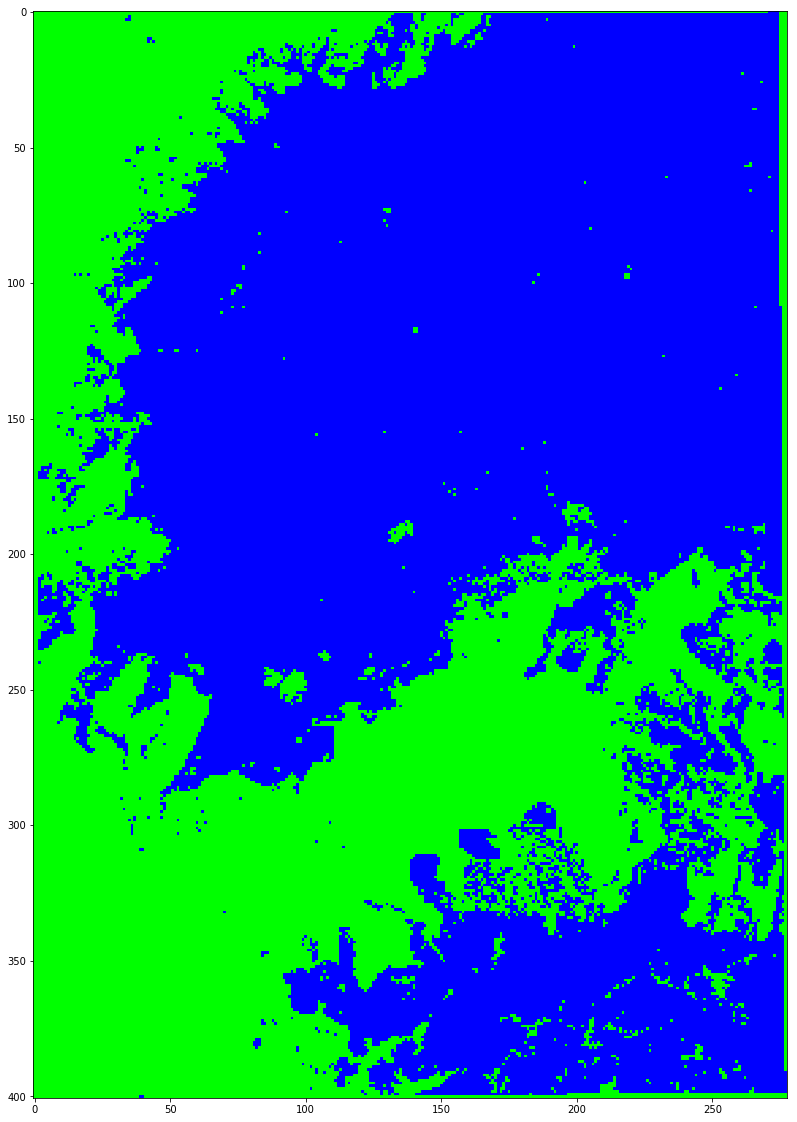

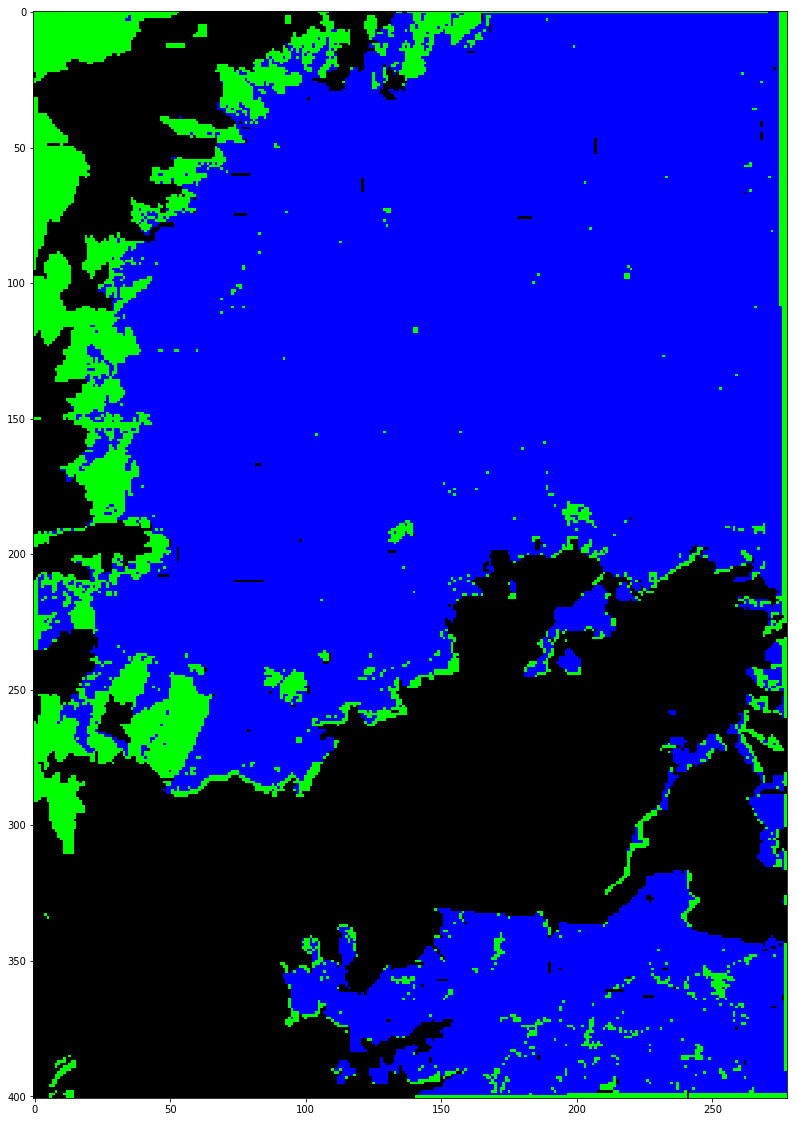

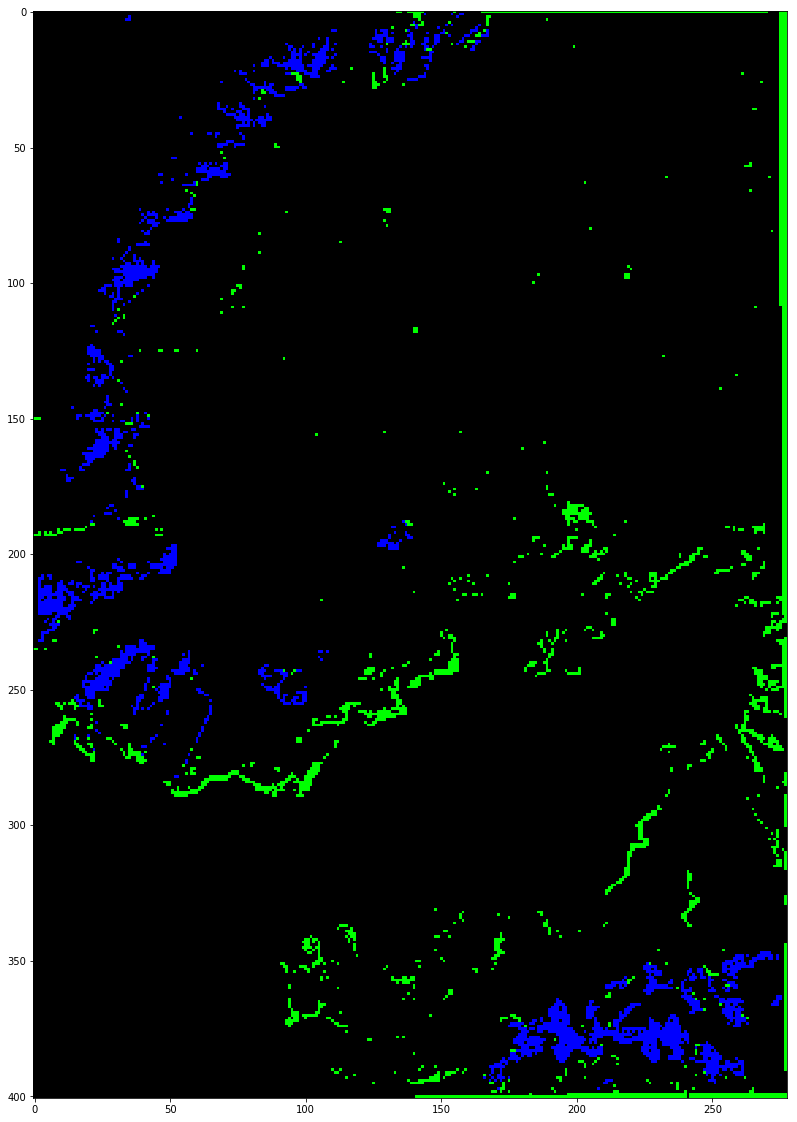

In [21]:
import spectral as spy
traint = spy.create_training_classes(spy_image,hnon)
gmlc1 = GaussianClassifier(traint)
clmap1 = gmlc1.classify_image(spy_image)
imshow(classes=clmap1,figsize=(20,20))
gtresultst1 = clmap1 * (hnon != 0)
v = imshow(classes=gtresultst1,figsize=(20,20))
training_errors2 = gtresultst1 * (gtresultst1 != hnon)
imshow(classes=training_errors2,figsize=(20,20))

In [22]:
import pandas as pd
hnf = hnon.flatten()
hnfnz = hnf[hnf != 0]
gnf = gtresultst1.flatten()
gnfnz = gnf[gnf != 0]

y_actu = pd.Series(hnfnz, name='Actual')
y_pred = pd.Series(gnfnz.flatten(), name='Predicted')
df_confusion_nz = pd.crosstab(y_actu, y_pred)

df_conf_norm = df_confusion_nz / df_confusion_nz.sum(axis=1)
df_conf_norm

Predicted,2,3
Actual,,
2.0,0.727380,0.044132
3.0,0.284077,0.954013


In [23]:
import sklearn
from sklearn import metrics
print("Cohen's Kappa:")
print(sklearn.metrics.cohen_kappa_score(y_actu, y_pred))
print("\nBalanced Accuracy:")
print(sklearn.metrics.balanced_accuracy_score(y_actu, y_pred))
print("\n")
print(sklearn.metrics.classification_report(y_actu, y_pred, digits=3))

Cohen's Kappa:
0.6781377978825263

Balanced Accuracy:
0.8406969567134086


              precision    recall  f1-score   support

         2.0      0.719     0.727     0.723     10124
         3.0      0.956     0.954     0.955     62540

    accuracy                          0.922     72664
   macro avg      0.837     0.841     0.839     72664
weighted avg      0.923     0.922     0.923     72664



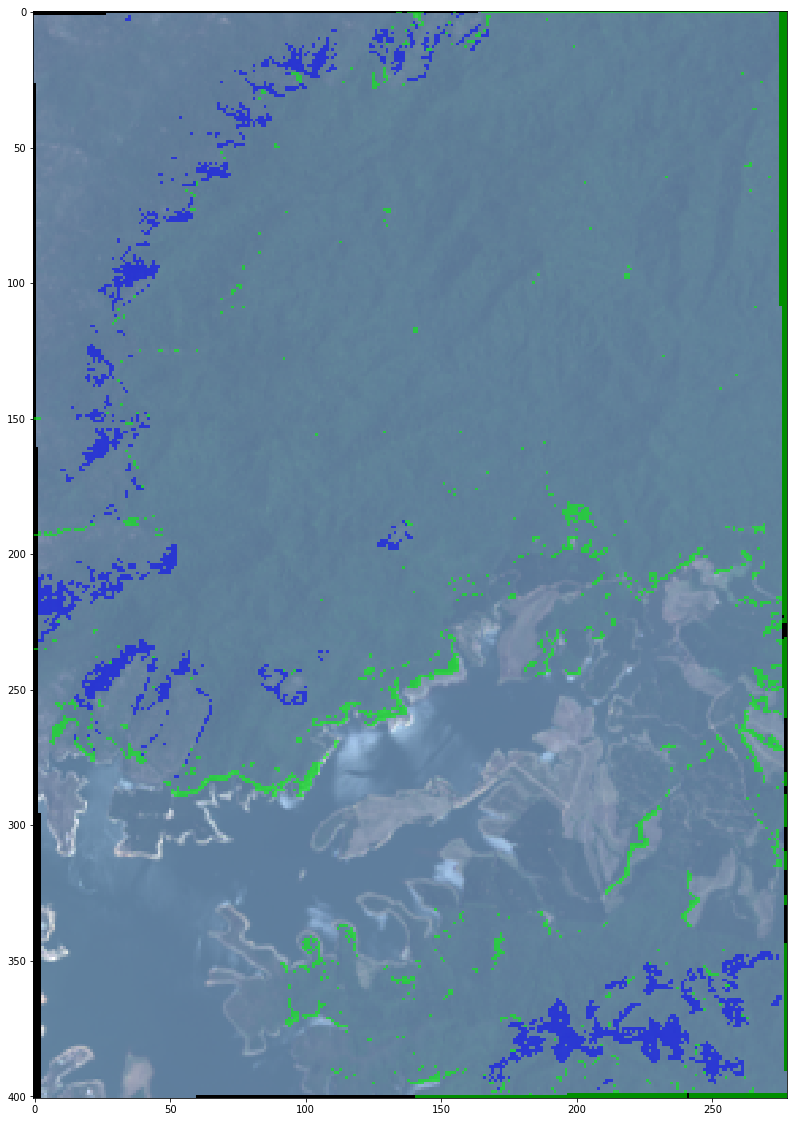

In [24]:

view = imshow(spy_image, (3, 2, 1), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.75

In [25]:
    def classify_image_wp(self, image):
        '''Classifies an entire image, returning a classification map.
        Arguments:
            `image` (ndarray or :class:`spectral.Image`)
                The `MxNxB` image to classify.
        Returns (ndarray):
            An `MxN` ndarray of integers specifying the class for each pixel.
        '''
        import math
        import spectral
        self.cache_class_scores = True
        #if not (self.cache_class_scores and isinstance(image, np.ndarray)):
        #    return super(GaussianClassifier, self).classify_image(image)

        status = spectral._status
        status.display_percentage('Processing...')
        shape = image.shape
        image = image.reshape(-1, shape[-1])
        scores = np.empty((image.shape[0], len(self.classes)), np.float64)
        delta = np.empty_like(image, dtype=np.float64)

        # For some strange reason, creating Y with np.emtpy_like will sometimes
        # result in the following error when attempting an in-place np.dot:
        #     ValueError: output array is not acceptable (must have the right
        #     type, nr dimensions, and be a C-Array)
        # It appears that this may be happening when delta is not contiguous,
        # although it isn't clear why the alternate construction of Y below
        # does work.
        Y = np.empty_like(delta)

        for (i, c) in enumerate(self.classes):
            scalar = math.log(c.class_prob) - 0.5 * c.stats.log_det_cov
            delta = np.subtract(image, c.stats.mean, out=delta)
            try:
                Y = delta.dot(-0.5 * c.stats.inv_cov, out=Y)
            except:
                # Unable to output np.dot to existing array. Allocate new
                # storage instead. This will not affect results but may be
                # slower.
                Y = delta.dot(-0.5 * c.stats.inv_cov)
            scores[:, i] = np.einsum('ij,ij->i', Y, delta)
            scores[:, i] += scalar
            print(scores.shape)
            status.update_percentage(100. * (i + 1) / len(self.classes))
            print(c)
        status.end_percentage()
        inds = np.array([c.index for c in self.classes], dtype=np.int16)
        mins = np.argmax(scores, axis=-1)
        #return inds[mins].reshape(shape[:2])
        return scores

In [26]:
    def classify_spectrum_ws(self, x):
        '''
        Classifies a pixel into one of the trained classes.
        Arguments:
            `x` (list or rank-1 ndarray):
                The unclassified spectrum.
        Returns:
            `classIndex` (int):
                The index for the :class:`~spectral.algorithms.TrainingClass`
                to which `x` is classified.
        '''
        from math import log

        scores = np.empty(len(self.classes))
        for (i, cl) in enumerate(self.classes):
            delta = (x - cl.stats.mean)
            scores[i] = log(cl.class_prob) - 0.5 * cl.stats.log_det_cov \
               - 0.5 * delta.dot(cl.stats.inv_cov).dot(delta)
        #return self.classes[np.argmax(scores)].index
        return scores

In [27]:
import spectral# as spy
image = spy_image
#from spy.algorithms import ImageIterator
from numpy import zeros
status = spectral._status
status.display_percentage('Classifying image...')
it = spectral.algorithms.ImageIterator(image)
class_map = zeros(image.shape[:2], np.int16)
score_map1 = zeros(image.shape[:2], np.int16)
score_map2 = zeros(image.shape[:2], np.int16)
#score_map3 = zeros(image.shape[:2], np.int16)
N = it.get_num_elements()
i, inc = (0, N / 100)
storn = []
storner = []
for spectrum in it:
    #print(classify_spectrum_ws(gmlcwp8,spectrum))
    stor = classify_spectrum_ws(gmlc1,spectrum)
    
    if not i % 100000:
        print(stor)
    #class_map[it.row, it.col] = classify_spectrum_ws(gmlcwp8,spectrum)
    score_map1[it.row, it.col] = stor[0]
    score_map2[it.row, it.col] = stor[1]
    #score_map3[it.row, it.col] = stor[2]
    storx = [0,0,0]
    storx[0] = abs(stor[0])
    storx[1] = abs(stor[1])
    #storx[2] = abs(stor[2])
    storn.append(storx)
    storcx = [0,0,0,0]
    storcx[0] = abs(stor[0])
    storcx[1] = abs(stor[1])
    storcx[2] = it.row
    storcx[3] = it.col
    storner.append(storcx)
    i += 1
    if not i % inc:
        status.update_percentage(float(i) / N * 100.)
        status.end_percentage()

Classifying image...  0.0%[ -77.49321444 -102.75981369]
[-68.05628183 -63.16112639]


In [29]:
x = abs(score_map2 - score_map1)
xx = x

In [97]:
xx = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(x[i][j]<100.0):
            xx[i][j] = x[i][j]
        else:
            xx[i][j] = 100.0

In [98]:
spy_image.shape

(441, 745, 12)

In [104]:
p = x.flatten()

In [105]:
p

array([88, 88, 88, ..., 88, 88, 88], dtype=int16)

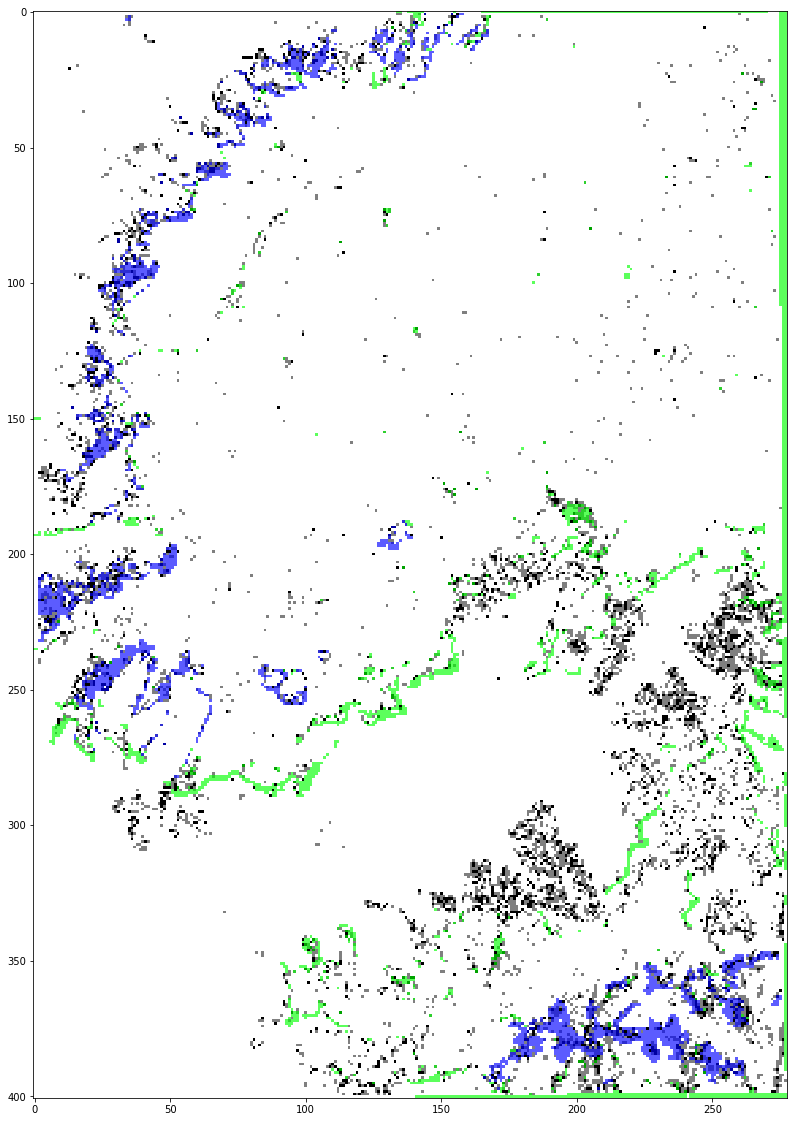

In [33]:
d = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(x[i][j]<2.0):
            d[i][j] = x[i][j]
        else:
            d[i][j] = 2.0
            
view = imshow(d, (0, 0, 0), classes=training_errors2,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.8

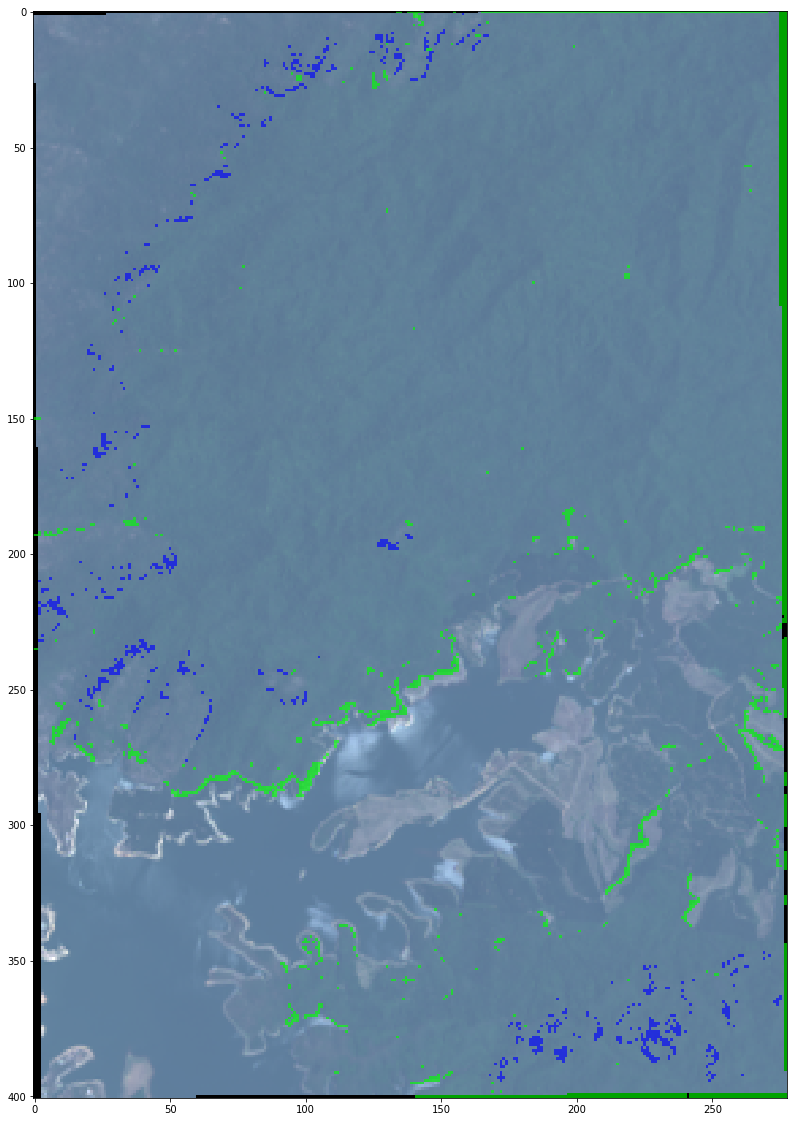

In [34]:
d = zeros(spy_image.shape[:2], np.int16)
for i in range(0,spy_image.shape[0]):
    for j in range(0,spy_image.shape[1]):
        if(training_errors2[i][j] != 0):
            if(x[i][j]>2.0):
                d[i][j] = training_errors2[i][j]

            
view = imshow(spy_image, (3, 2, 1), classes=d,figsize=(20,20))
view.set_display_mode('overlay')
view.class_alpha = 0.8

In [35]:

rdf = pd.DataFrame(columns=['cutoff', 'kappa', 'accuracy','pixels_proportion_excluded'])
d = np.copy(gtresultst1)
dz = zeros((441, 745))
hnf = hnon.flatten()
hnfnz = hnf[hnf != 0]
y_actu = pd.Series(hnfnz.flatten(), name='Actual')

for pcutoff in range(0,40):
    cutoff = 0.0 + (pcutoff * 0.1)
    d = np.copy(gtresultst1)
    ds = 0
    for i in range(0,spy_image.shape[0]):
        #print(i)
        #print(ds)
        for j in range(0,spy_image.shape[1]):
            #if(training_errors2[i][j] != 0):
            if(x[i][j]<cutoff):
                    ds += 1
                    d[i][j] = hnon[i][j]

    #print(pcutoff)
    #print(cutoff)
    #print(f"sd:{ds}")
    #training_errors3 = d * (d != hnon)
    #view = imshow(spy_image, (3, 2, 1), classes=training_errors3,figsize=(20,20))
    #view.set_display_mode('overlay')
    #view.class_alpha = 0.8
    gnf = d.flatten()
    gnfnz = gnf[gnf != 0]
    y_pred = pd.Series(gnfnz.flatten(), name='Predicted')
    df_confusion_nz = pd.crosstab(y_actu, y_pred)
    df_conf_norm = df_confusion_nz / df_confusion_nz.sum(axis=1)
    #print(cutoff)
    kappa = sklearn.metrics.cohen_kappa_score(y_actu, y_pred)
    accu = sklearn.metrics.balanced_accuracy_score(y_actu, y_pred)
    rdf = rdf.append({
     "cutoff": cutoff,
     "kappa":  kappa,
        "accuracy": accu,
        "pixels_proportion_excluded": ds / 328545
      }, ignore_index=True)

In [36]:
rdf

,cutoff,kappa,accuracy,pixels_proportion_excluded
0,0.0,0.678138,0.840697,0.000000
1,0.1,0.715246,0.862064,0.007731
2,0.2,0.715246,0.862064,0.007731
3,0.3,0.715246,0.862064,0.007731
4,0.4,0.715246,0.862064,0.007731
5,0.5,0.715246,0.862064,0.007731
6,0.6,0.715246,0.862064,0.007731
7,0.7,0.715246,0.862064,0.007731
8,0.8,0.715246,0.862064,0.007731
9,0.9,0.715246,0.862064,0.007731
